In [74]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [75]:
# Create list of all targets (minus background noise)
dataset_path = './recording'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['ㄏㄧㄡ', 'ㄟ', '吼', '啦', '嗯', '的一個', '的這個', '的那個', '著', '那', '那那個', '阿']


In [76]:
# Settings
feature_sets_path = './'
feature_sets_filename = './recording23.npz'
#model_filename = 'wake_word_stop_model.h5'
#wake_word = '嗯'

In [77]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [78]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
print(y_test)
print(y_train)
print(y_val)

[ 2.  7.  5.  9.  1.  0.  1.  6.  7.  9. 10.  1.  1.  8.  9.  2. 11.  8.
  1.  0. 10.  5.  6.  7.  4.  7.  7.  3.  2. 10.  7.  5.  2.  0.  1. 11.]
[10.  9.  6.  3.  7.  7.  4.  8.  9.  0.  3. 10. 11.  2.  2.  5.  0.  6.
 11.  0.  0.  0. 10.  4.  8.  3. 10.  0.  8.  0.  6.  9.  4.  3.  9. 10.
  5. 10.  6. 10.  5.  7.  8.  5.  3.  4.  6.  4.  8.  1.  7.  4.  9.  5.
  1. 10.  3.  0.  3. 10.  4. 11.  3.  8.  7.  6.  2.  2.  4.  5.  6.  5.
  1.  9.  4.  1.  0.  9.  8.  4.  6.  2. 10.  0.  5.  5.  0.  6. 11.  6.
  5.  5.  1.  9. 10.  2.  4.  4.  4.  4.  1. 11.  5.  1.  6. 11.  8.  6.
  6. 10.  2.  9.  8. 10. 11.  7.  2. 10. 10.  7.  1.  1.  9.  6.  3.  9.
  3.  5. 11.  4.  8.  7.  2.  3. 11.  4. 10.  2.  1.  6.  0. 10.  5.  5.
  3. 11.  2.  4. 10.  3.  2.  4.  9.  2.  9.  8.  7.  8.  8. 10.  5. 11.
  9.  9.  4. 11.  8.  8.  3.  7.  9. 11.  4.  1.  6.  0. 10.  7.  1.  1.
 11.  0.  6.  5.  7. 11.  2.  3.  8. 11.  5.  7.  2.  8.  9.  0.  1.  3.
  0.  7.  4. 11.  3. 11. 10.  7. 10.  8.  9.  1.  

In [79]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(288, 23, 16)
(36, 23, 16)
(36, 23, 16)


In [80]:
# Peek at labels
print(y_val)

[ 8.  6.  9.  1.  0.  8.  4. 11.  7.  6.  0. 11.  6.  7.  2.  3.  0.  7.
  9.  6.  8.  2.  4.  9.  5.  2.  3.  3.  1.  1.  1.  1.  0.  3.  3.  1.]


In [81]:
# Peek at labels after conversion
print(y_test)

[ 2.  7.  5.  9.  1.  0.  1.  6.  7.  9. 10.  1.  1.  8.  9.  2. 11.  8.
  1.  0. 10.  5.  6.  7.  4.  7.  7.  3.  2. 10.  7.  5.  2.  0.  1. 11.]


In [82]:
# View the dimensions of our input data
print(x_train.shape)

(288, 23, 16)


In [83]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(288, 23, 16, 1)
(36, 23, 16, 1)
(36, 23, 16, 1)


In [84]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(23, 16, 1)


In [102]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#model.add(layers.Conv2D(32, (2, 2), activation='relu'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))#64
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))#64
model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))
# Display model
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 22, 15, 32)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 11, 7, 32)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 6, 64)         8256      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 3, 64)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 5, 3, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)               

In [103]:
from tensorflow.keras import optimizers
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',    #'adam'
              metrics=['acc'])

In [104]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=100,
                    batch_size=20,#20
                    validation_data=(x_val, y_val))

Epoch 1/100
15/15 [==============================] - 1s 28ms/step - loss: 3.7826 - acc: 0.0590 - val_loss: 2.4428 - val_acc: 0.2500
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 2.6277 - acc: 0.0799 - val_loss: 2.4885 - val_acc: 0.1111
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 2.4749 - acc: 0.1493 - val_loss: 2.4858 - val_acc: 0.1111
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 2.4926 - acc: 0.1493 - val_loss: 2.4416 - val_acc: 0.1111
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 2.4539 - acc: 0.1528 - val_loss: 2.3573 - val_acc: 0.3056
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 2.3815 - acc: 0.1736 - val_loss: 2.2937 - val_acc: 0.2500
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 2.3598 - acc: 0.1667 - val_loss: 2.2296 - val_acc: 0.3056
Epoch 8/100
15/15 [==============================] - 0s 8ms/step - loss: 2.2036 - 

15/15 [==============================] - 0s 8ms/step - loss: 0.2043 - acc: 0.9340 - val_loss: 0.3273 - val_acc: 0.9167
Epoch 64/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1903 - acc: 0.9479 - val_loss: 0.3698 - val_acc: 0.9167
Epoch 65/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1322 - acc: 0.9583 - val_loss: 0.3505 - val_acc: 0.9167
Epoch 66/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2192 - acc: 0.9167 - val_loss: 0.3649 - val_acc: 0.9167
Epoch 67/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1720 - acc: 0.9444 - val_loss: 0.4228 - val_acc: 0.9167
Epoch 68/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1951 - acc: 0.9410 - val_loss: 0.3912 - val_acc: 0.9167
Epoch 69/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1858 - acc: 0.9375 - val_loss: 0.4234 - val_acc: 0.9167
Epoch 70/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1417 - acc: 0

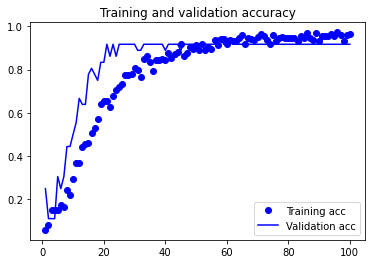

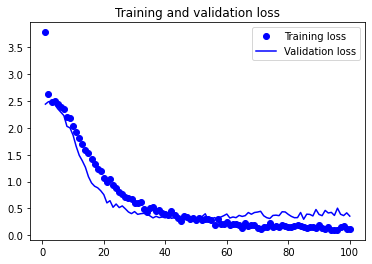

In [105]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [109]:
# Save the model as a file
models.save_model(model, './h5/recording23.h5')

In [110]:
# TEST: Load model and run it against test set
model = models.load_model('./h5/recording23.h5')
for i in range(0, 10):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 2.0  Prediction: [[4.4359103e-06 2.6958129e-09 9.9985063e-01 7.5921516e-06 3.7867487e-08
  6.5793524e-13 3.1383868e-07 7.8117495e-08 1.7654680e-06 3.9794010e-08
  4.2247702e-08 1.3496869e-04 3.7791935e-12]]
Answer: 7.0  Prediction: [[3.6365040e-05 7.4549106e-08 2.5086486e-04 4.6623822e-07 1.6641480e-01
  8.3418381e-06 1.6976592e-01 3.0138972e-01 5.9404090e-05 2.3754170e-05
  3.6190540e-01 1.4488265e-04 7.4705753e-08]]
Answer: 5.0  Prediction: [[5.14389321e-05 1.43850798e-06 1.65159362e-11 8.84623603e-07
  4.67886423e-08 9.99901891e-01 1.26844228e-07 8.88241374e-08
  4.36098417e-05 1.02476086e-07 4.26763876e-07 1.11959275e-09
  9.20800311e-11]]
Answer: 9.0  Prediction: [[2.0604901e-05 1.4680536e-05 8.9481000e-05 2.5006573e-04 5.0227285e-05
  4.4698063e-06 9.7850216e-07 1.6618409e-04 8.3905397e-06 9.9198830e-01
  6.5795863e-03 8.2679203e-04 2.9041331e-07]]
Answer: 1.0  Prediction: [[5.2218929e-06 9.9999094e-01 2.7041754e-08 3.8029516e-08 3.0436122e-06
  1.9882608e-11 6.8441437e-1

In [111]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.2502 - acc: 0.8611


[0.250222772359848, 0.8611111044883728]